<a href="https://colab.research.google.com/github/LLAlex85/CPP/blob/master/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion Lineal 
##Determinando precio de casa habitación dependiendo la cantidad de habitaciones en Boston

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds

boston = ds.load_boston();
boston

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

Los datos anteriores muestran que la columna RM o columna 5 contiene la catidad promedio de habitaciones, mientras que target muestra el precio.

El código siguiente calcula la pendiente y el offset dado un set de datos. 

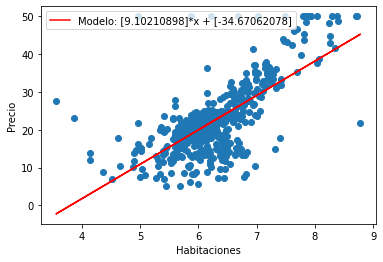

In [62]:
#define funciones para calcular pendiente y offset para regresion lineal
def get_m (X, Y):

  N = len(X)
  m = 0
  A = B = C = D = 0
  for i in range (N):
    A += X[i]*Y[i]
    B += Y[i]
    C += X[i]*X[i]
    D += X[i]

  m = (N*A - B*D)/(N*C - D*D)
  return m

def get_b(X,Y, m):

  N = len(X)
  b = 0
  A = B = 0
  for i in range (N):
    A += Y[i]
    B += X[i]

  b = (A - m*B)/N
  return b

X = boston.data[:, 5:6]
Y = boston.target

m = get_m(X,Y)
b = get_b(X,Y,m)

out = [ x*m + b for x in X ]
plt.scatter(X,Y)
plt.plot(X,out, "red", label=f"Modelo: {m}*x + {b}")
plt.xlabel("Habitaciones")
plt.ylabel("Precio")
plt.legend(loc="upper left")